### **This is script functions independently from the other LEADS scripts, though it is best to run this after running nipype. This Swarm_Plot script generates box/swarm plots for the aparc / aseg statistics after running the freesurfer commands (which generate the aparc/aseg stat tables).*

In [2]:
def add_group(df,df2):
    for row in range(0, len(scan_info.index)):
                # index values of every row with inclusion criteria (obain task name and run #)
                if element in scan_info.iloc[row,1]:
                    print('Currently unpacking functional runs for '+element)
                    if userinput == 1:
                        scan_name_index.append(scan_info.iloc[row,1])
                        scan_num_index.append(scan_info.iloc[row,0])
                    else:
                        #exit the whole loop
                        # ask for confirmation of task contents (these are all the runs)
                        instring = 'Would you like to include run '+str(scan_info.iloc[row,1])+' for task '+str(element)+' ?'
                        userinput = verifyrun(instring)


In [3]:
def parserow(rows,cols,rois):
    lastrowL = (rows*cols)
    lastrowF = (rows*cols)-(cols)
    return [rois[i] for i in range(lastrowF, lastrowL)]

In [4]:
def makenames(rois):
    trunc_aseg = list(rois)
    trunc_aseg[2] = 'L-Cerebellum-WM'
    trunc_aseg[3] = 'L-Cerebellum-Ctx'
    trunc_aseg[18] = 'R-Lat-Ventricle'
    trunc_aseg[20] = 'R-Cerebellum-WM'
    trunc_aseg[21] = 'R-Cerebellum-Ctx'
    trunc_aseg[33] = 'WM-hypo-I'
    trunc_aseg[34] = 'L-WM-hypo-I'
    trunc_aseg[35] = 'R-WM-hypo-I'
    trunc_aseg[36] = 'Non-WM-hypo-I'
    trunc_aseg[37] = 'L-Non-WM-hypo-I'
    trunc_aseg[38] = 'R-Non-WM-hypo-I'
    trunc_aseg[46] = 'SegVNotVent'
    trunc_aseg[47] = 'SegVNotVentSurf'
    trunc_aseg[51] = 'lhCerebralWMVol'
    trunc_aseg[52] = 'rhCerebralWMVol'
    trunc_aseg[53] = 'CerebralWMVol'
    trunc_aseg[56] = 'SupraTentVol'
    trunc_aseg[57] = 'SupraTentVNotVent'
    trunc_aseg[58] = 'SupraTentVNotVentVox'
    trunc_aseg[65] = 'eTotalICV'
    return trunc_aseg

aseg
66
lh
38
there is no graph eTIV to print for this block 37
there is no graph Unnamed: 38 to print for this block 37
rh
37
there is no graph eTIV to print for this block 37


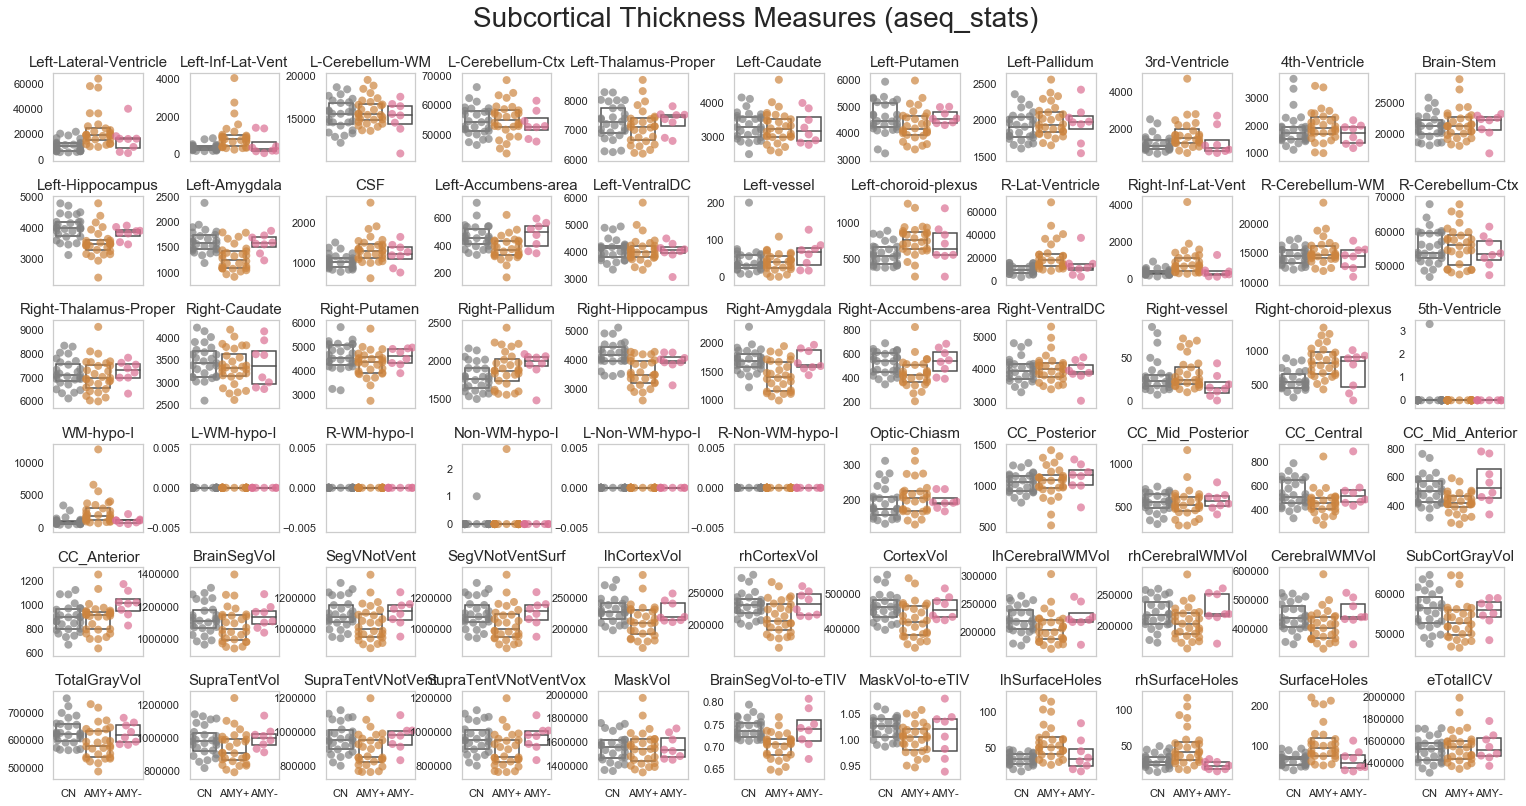

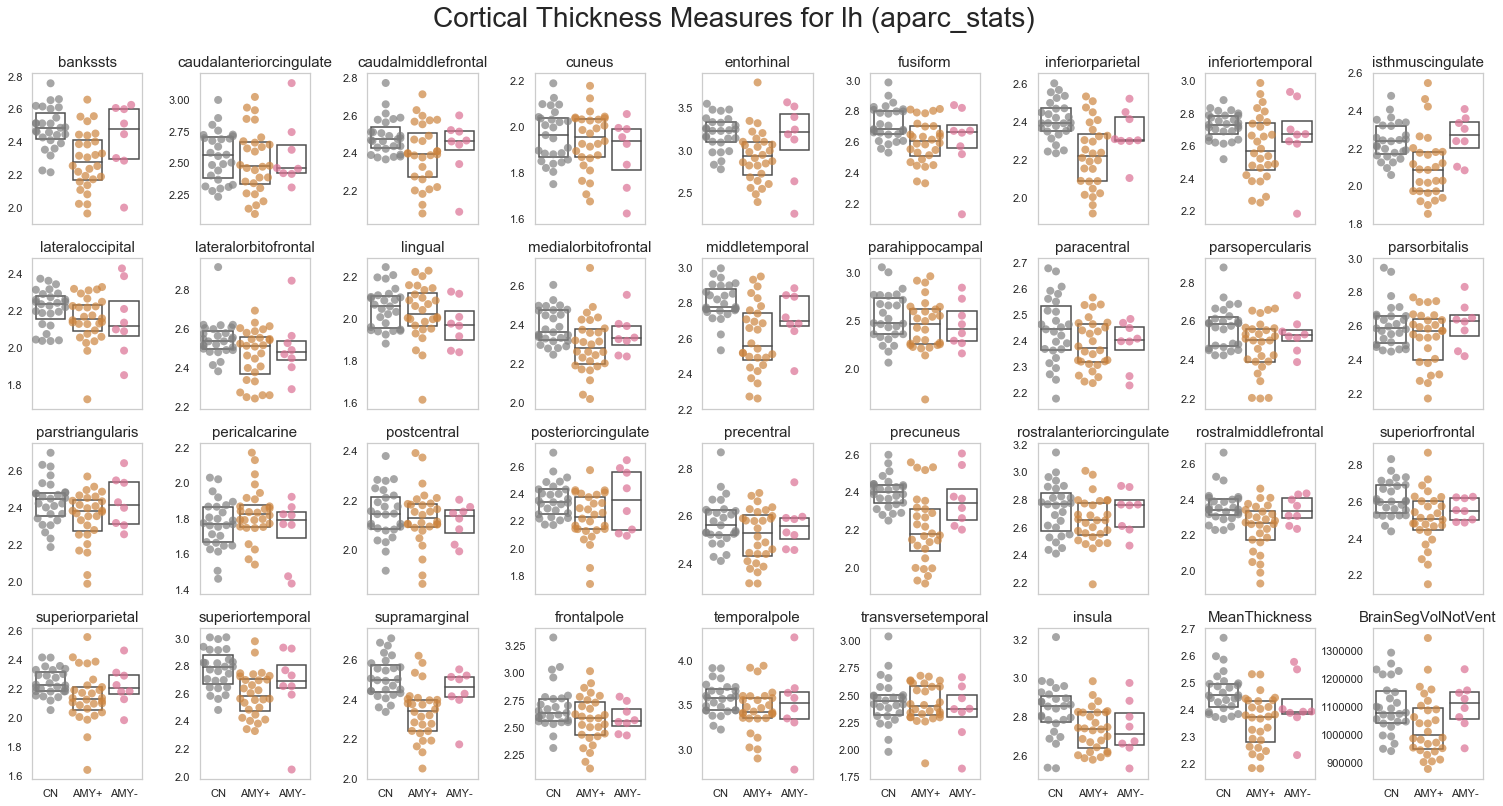

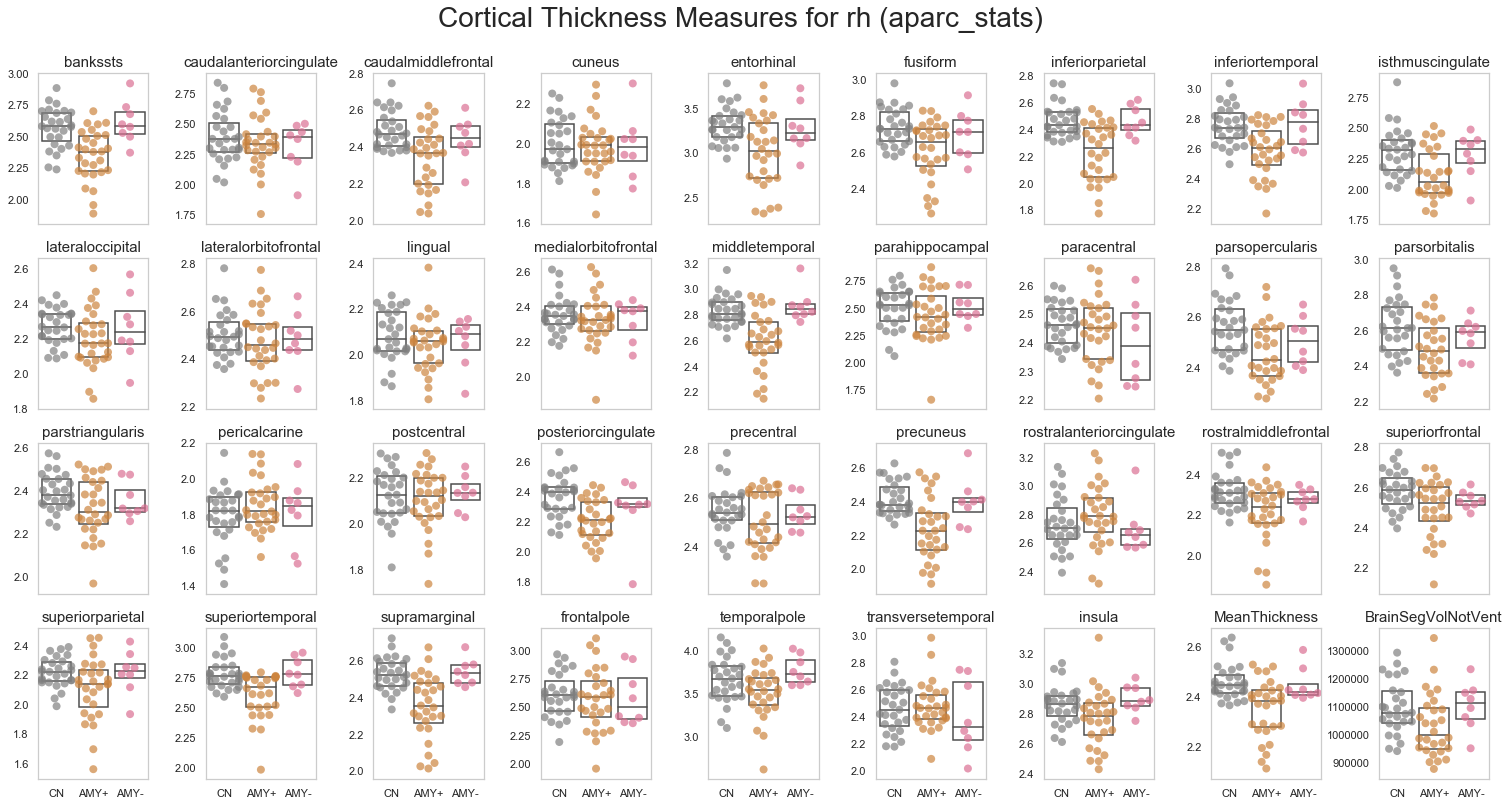

In [57]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import re
import matplotlib.transforms as transforms
flatui = ["grey", "peru", "palevioletred"]

hemi = ['aseg', 'lh', 'rh']

for tab in hemi:
    print(tab)
    # hemisphere
    
    if tab == 'aseg':
        selectiontitle = 'Subcortical Thickness Measures (aseg_stats)'
        statspathway = '/autofs/cluster/animal/scan_data/leads/analyses_nip/RECON_FLAIR/leads_aseg_vol.txt'
        rows= 6
        cols= 11
        spacing = .4
    else:
        statspathway = '/autofs/cluster/animal/scan_data/leads/analyses_nip/RECON_FLAIR/leads_'+tab+'_aparc_thickness.txt'
        rows= 4
        cols= 9
        spacing = .22
        selectiontitle = 'Cortical Thickness Measures for '+tab+' (aparc_stats)'
    
    # import dataset
    df = pd.read_csv(statspathway, sep='\t',index_col=0) 
    df2 = pd.read_csv('/autofs/cluster/animal/scan_data/leads/analyses_nip/RECON_FLAIR/demographics_final', sep='\t', index_col=0) #, names=colnames)

    # concatenate dataframes
    df_final = df.join(df2)
    
    if tab == 'aseg':
        df_final.to_csv('/autofs/cluster/animal/scan_data/leads/analyses_nip/RECON_FLAIR/LEADS_aseg_vol')
    elif (tab == 'lh'):
        df_final.to_csv('/autofs/cluster/animal/scan_data/leads/analyses_nip/RECON_FLAIR/LEADS_aparc_lh_thickness')
    elif (tab == 'rh'):
        df_final.to_csv('/autofs/cluster/animal/scan_data/leads/analyses_nip/RECON_FLAIR/LEADS_aparc_rh_thickness')
                          
    rois = list(df_final)[:-1]
    print(len(rois))
    
    if tab == 'aseg':
        trunc_aseg = makenames(rois)
    
    # make a list from last row indices
    lastrow = parserow(rows, cols, rois)
    
    fig = plt.figure(figsize=(26, 13))
    fig.subplots_adjust(hspace=spacing, wspace=.52)
    ttl = fig.suptitle(selectiontitle, fontsize=28)
    ttl.set_position([.5, .95])
    counter = 1
    for i in rois:
        if tab == 'aseg':
            shortname = trunc_aseg[counter-1]
        else:
            try:
                shortname = re.search(tab+'_'+'(.*?)'+'_thickness', i).group(1)
            except AttributeError:
                shortname = i
        try: 
            sns.set(style="whitegrid")
            ax = plt.subplot(rows, cols, counter)
            ax = sns.boxplot(x= 'Group', y=i, data=df_final, showcaps=False, boxprops={'facecolor':'None'}, showfliers=False, whiskerprops={'linewidth':0})
            ax2 = sns.swarmplot(x= 'Group', y=i, hue='Group', data=df_final, palette=flatui, alpha=0.7, s=8)
            ax2.set_ylabel('')
            ax2.set_xlabel('')
            ax2.axes.set_title(shortname, fontsize=15)
            ax2.legend_.remove()
            ax2.grid(False)
            if i not in lastrow:
                ax2.set_xticklabels([])
    #           if (i == rois[35]) or (i == rois[36]):
    #               ax.ticklabel_format(style='plain', axis='y')
            counter = counter + 1
        except ValueError:
            print('there is no graph '+i+' to print for this block '+str(counter))
    plt.savefig('/autofs/cluster/animal/scan_data/leads/analyses_nip/RECON_FLAIR/figures/'+tab+'boxswarmplot.png')

66


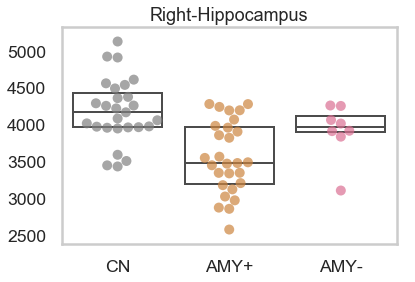

In [67]:
selectiontitle = 'Subcortical Thickness Measures (aseg_stats)'
statspathway = '/autofs/cluster/animal/scan_data/leads/analyses_nip/RECON_FLAIR/leads_aseg_vol.txt'
#selectiontitle = 'Cortical Thickness Measures for '+'rh'+' (aparc_stats)'
#statspathway = '/autofs/cluster/animal/scan_data/leads/analyses_nip/RECON_FLAIR/leads_rh_aparc_thickness.txt'

# import dataset
df = pd.read_csv(statspathway, sep='\t',index_col=0)
df2 = pd.read_csv('/autofs/cluster/animal/scan_data/leads/analyses_nip/RECON_FLAIR/demographics_final', sep='\t', index_col=0) #, names=colnames)

# concatenate dataframes
df_final = df.join(df2)
newdf = df_final
#newdf = df_final.drop(index='LDS0730001_20180619') # remove this invalid subject
rois = list(newdf)[:-1]
print(len(rois))
flatui = ["grey", "peru", "palevioletred"]


NAME = 'Right-Hippocampus'
#rh_entorhinal_thickness #rh_MeanThickness_thickness #rh_precuneus_thickness
#'EstimatedTotalIntraCranialVol' #'Left-Hippocampus' #Right-Hippocampus
# ttl = plt.suptitle(selectiontitle, fontsize=28)
# plot one figure
ax = plt
sns.set(style="whitegrid")
sns.set_context("poster", font_scale=.8, rc={"lines.linewidth": 2})
ax = sns.boxplot(x= 'Group', y=NAME, data=newdf, showcaps=False, boxprops={'facecolor':'None'}, showfliers=False, whiskerprops={'linewidth':0})
ax2 = sns.swarmplot(x= 'Group', y=NAME, hue='Group', data=newdf, palette=flatui, alpha=0.7, s=10)
ax2.set_ylabel('')
ax2.set_xlabel('')
#ax2.ticklabel_format(style='sci', axis='y')

ax2.axes.set_title(NAME, fontsize=18)
ax2.legend_.remove()
ax2.grid(False)
plt.savefig('/autofs/cluster/animal/scan_data/leads/analyses_nip/RECON_FLAIR/figures/'+NAME+'boxswarmplot.png', bbox_inches="tight")